In [119]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, RocCurveDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)

In [120]:
Filename="Student_performance_data .csv" #importing .csv file using pandas
df=pd.read_csv(Filename)

In [121]:
x = df.drop(['GradeClass','StudentID'], axis=1)
y=df["GradeClass"]

In [122]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [123]:
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

model = LogisticRegression(random_state = 0, solver='lbfgs',max_iter=1000)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test) 


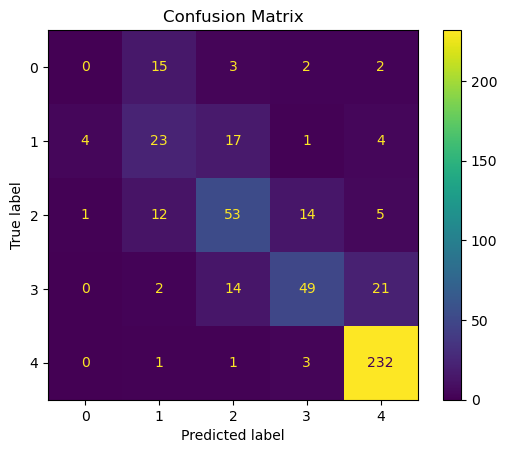

In [124]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [125]:
# Evaluate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 80.71%
Test Accuracy: 74.53%

Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.43      0.47      0.45        49
         2.0       0.60      0.62      0.61        85
         3.0       0.71      0.57      0.63        86
         4.0       0.88      0.98      0.93       237

    accuracy                           0.75       479
   macro avg       0.53      0.53      0.52       479
weighted avg       0.71      0.75      0.73       479



In [126]:
# ROC Curve (Only if binary classification)
if len(model.classes_) == 2:
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=model.classes_[1])
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.title("ROC Curve")
    plt.show()
else:
    print("ROC Curve skipped (only applicable for binary classification).")

ROC Curve skipped (only applicable for binary classification).


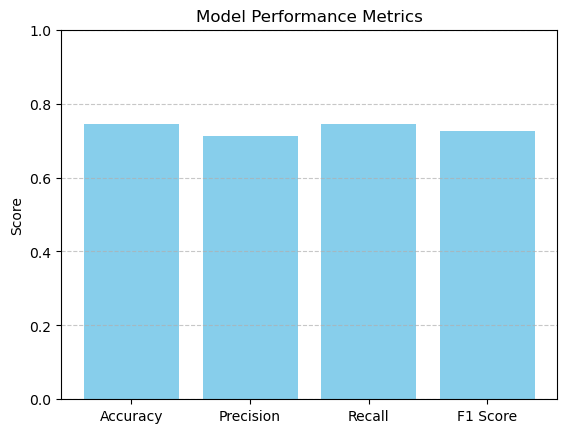

In [127]:


metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred, average='weighted'),
    "Recall": recall_score(y_test, y_test_pred, average='weighted'),
    "F1 Score": f1_score(y_test, y_test_pred, average='weighted')
}

# 11. Plot metrics
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.title("Model Performance Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()